# Longitudinal wave kinematics

### Here I look at how a longitudinal wave of finite energy (some fraction F of M) would need to behave in order to work.

### called kinematics, as I am basically guessing at the form of the wave based on hueristics. Thus a guess metric can be entered into the Einstein equations to deterime if it is a vacuum solution. 

### Longitudinal, radial wave

<img src="img/longwave.jpg" alt="Long wave" width="500"/>


### Consider the wave as moving from left to right, say away from a Schwarschild solution on the left. 
    The wave is composed of pure "Lynden-Bell Katz (1985) gravitational energy density" and as such is not accompanied by any matter or EM energy. 
    
#### Considerations:
 * Assume M_2 > M_1. (can be the other way too) M_2 is towards the outside world.
 * The energy in the wave $ \Delta R $ across must total the delta mass $ M_2  - M_1 $ 
 * The mass (by Birckoff's Theorem) must smoothly move from  $ M_2 $ to $ M_1 $ 

These are enough to deterimine the length of a wave as a function of R and $ \Delta M $


## Wave energy density: 
By simple arithmetic, this means the energy density in $ \Delta R $ over a spherical surface of radius $ R $

$$ \begin{equation}
    E_D = \frac{M_2 - M_1}{\Delta R \ 4 \pi R^2} 
\end{equation} $$

### LBK energy: 
##### REF Lynden Bell and Katz: 1985 Gravitational field energy density for spheres and black holes
<img src="img/lbk-energy-density.png" alt="LBK 1985 equation" width="400"/>

From Birchoff viewing from the right we have a measured mass (energy) inside R to change from $ M_2 $ to $ M_1 $, as one moves  $ \Delta R $ to the left. 


BUT we are demanding that this energy come in the form of all gravitational energy density, so we also have (use approx for $ R \gg M $ ), the LBK energy density in the region around R, where M is going from M_2 to M_1... so effective M is (M_2 + M_1)/2 (see equations in the LBK paper). 


$$  \begin{equation}
    E_D (LBK) = \frac{G}{8 \pi}  \frac{((M_2 + M_1)/2)^2}{R^4}
\end{equation} $$

We demand these energy densities to be equal so that all the energy can be expressed as gravitational energy, then solve for $ \Delta R $, I add in $ c $ for units to be all correct here:

$$  \begin{equation}
    \Delta R  = \frac{8 c^2 }{G} \ R^2 \ \frac{M_2 - M_1}{(M_2 + M_1)^2}
\end{equation} $$

Or if M_2 - M_1 is small, $\Delta M $
$$  \begin{equation}
    \Delta R  = \frac{8 c^2 }{G} \ R^2 \ \frac{\Delta M}{M^2}
\end{equation} $$

We modelled one small increase in mass - a longitudinal wave, and find that the wavelength increases with the square of the distance from the black hole. 

### Wave velocity
How do we get the wave velocity? It seems like there is no obvious velocity formula from energy considerations. 

Look instead at the driving frequency, the mass change happens over a period $ \Delta t $ so the driving frequency sets the wave speed (?), just as the driving $ \Delta M $ sets the wavelength parameterization.  


In [9]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
import einsteinpy

from sympy import symbols, sin, cos, sinh, ln, pi, sqrt, diff
from sympy.utilities.lambdify import lambdify

from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()
print(einsteinpy.__version__)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)




0.4.0


In [10]:
# deltaR 
from sympy.abc import M, R, F, D
#use geometric coords
F = 1
# F is fraction so we have F*M/M**2 which is F/M 
deltaR = R**2*F/M

deltaR


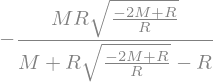

In [11]:
#exact Brown and Lynden-Bell

# E_d is energy densisty change condition that its all gravitational D === dR
E_d = F*M/(D*4*pi*R**2)

#exact Brown and Lynden-Bell

#Brown 
E_d3 = -1/(4*pi)*(1 - (1 - M/R)/sqrt((1 - 2*M/R)))/R**2

#Brown total 
#E_d + E_d3 = 0

dR_BY = sympy.solve(E_d + E_d3, D)[0]

dR_BY = -dR_BY

dR_BY


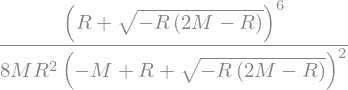

In [12]:
#exact LB
E_dLB = M**2/(8*pi*(M/(-M + R + sqrt(R*(-2*M + R))) + 1)**6*(-M/2 + R/2 + sqrt(R*(-2*M + R))/2)**4)

dR_LB = sympy.solve(E_d + E_dLB, D)[0]

dR_LB = -dR_LB

dR_LB


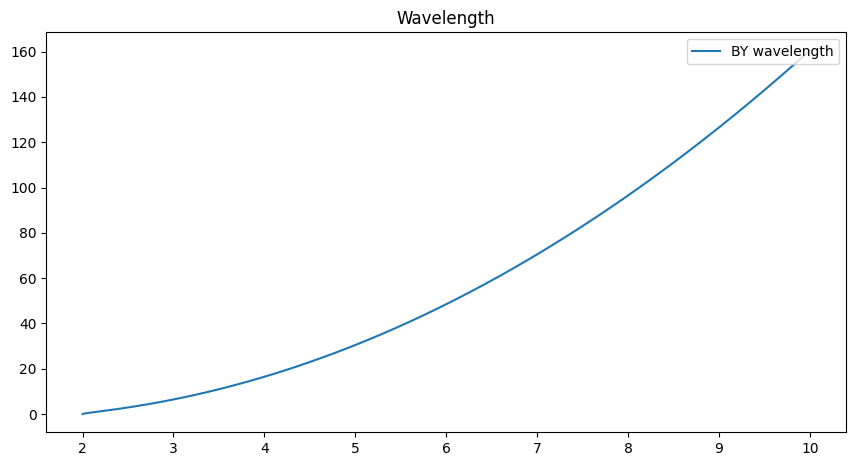

In [13]:
#wave front velocity as a function of r
# for a typical sine wave travelling along we have (v == velocity) 
#normalSin = sin(w*(syms[0] - syms[1]/v))
#so for us we have a wave front velocity - just mult by r/r and v
#normalSin = sin(w*(syms[0] - syms[1]/(syms[1]/ln(syms[1]*F)))
#M = 1
#Make x values - which we will sub in for r 
x = np.arange(2.000, 10.01, 0.01)
func_deltaR = lambdify([R,M], deltaR, "numpy")
func_deltaR_BY = lambdify([R,M], dR_BY, "numpy")
func_deltaR_LB = lambdify([R,M], dR_LB, "numpy")
m_val = 1.0
func_deltaR_vals = func_deltaR(x, m_val)
func_deltaR_BY_vals = func_deltaR_BY(x, m_val)
func_deltaR_LB_vals = func_deltaR_LB(x, m_val)
#print(func_deltaR_vals)
fig=plt.figure(figsize=(8, 4))
ax=fig.add_axes([0,2,1.0,1.0])
#ax.plot(x,func_deltaR_vals, label="Approx wavelength")
ax.plot(x,func_deltaR_BY_vals, label="BY wavelength")
#ax.plot(x,func_deltaR_LB_vals, label="LB wavelength")

ax.set_title("Wavelength")

ax.legend(loc="upper right")
